In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
meta = pd.read_csv("./p01_input.csv", encoding='CP949')
meta = meta[ ['키', '몸무게'] ]
meta = meta.dropna(axis=0) # nan 값이 존재하는 행 삭제
meta

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5
...,...,...
9681,176.1,50.4
9682,174.1,88.8
9683,169.5,63.2
9684,159.2,52.9


In [ ]:
height = meta['키'].mean()
weight = meta['몸무게'].mean()

print(f'학생들의 평균 키 = {height}, 학생들의 평균 몸무게 = {weight}')

학생들의 평균 키 = 154.56483164635458, 학생들의 평균 몸무게 = 50.20759140673406


In [ ]:
def pearson_similarity(u1, u2):
    u1_c = u1 - u1.mean()
    u2_c = u2 - u2.mean()
    denom = ((u1_c ** 2).sum() * (u2_c ** 2).sum()) ** 0.5
    if denom == 0:
        return 0
    else:
        return (u1_c * u2_c).sum() / denom
    
pearson = pearson_similarity(meta['키'], meta['몸무게'])
print(f'키와 몸무게 사이의 상관관계 = {pearson}')

키와 몸무게 사이의 상관관계 = 0.8490058387689018


In [ ]:
x_train = torch.FloatTensor(meta['키'])
x_train = torch.unsqueeze(x_train, 1)
y_train = torch.FloatTensor(meta['몸무게'])
y_train = torch.unsqueeze(y_train, 1)
print(f'x_train : {x_train}')
print(f'y_train : {y_train}')

x_train : tensor([[125.8000],
        [124.3000],
        [119.2000],
        ...,
        [169.5000],
        [159.2000],
        [162.0000]])
y_train : tensor([[27.3000],
        [25.4000],
        [23.5000],
        ...,
        [63.2000],
        [52.9000],
        [67.7000]])


In [ ]:
# ===============================================
# 1번 방법 : 기존의 경사하강법 이용해서 학습하기
# cost가 천천히 줄어들어 많은 반복이 필요하다.
# ===============================================

# w, b 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

# v 초기화
vW = torch.zeros(1,1)
vb = torch.zeros(1,1)

# learning rate, momentum 설정
lr = 0.000041
momentum = 0.999

for epoch in range(3000001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)
 
  cost.backward()

  with torch.no_grad():
    W = W - lr * W.grad 
    b = b - lr * b.grad

  if epoch % 300000 == 0:
    print(f'epoch : {epoch}, cost : {cost.item():6f}, W : {W.squeeze()}, b : {b.squeeze()}')

epoch : 0, cost : 2812.360352, W : 0.6565200686454773, b : 0.004117022268474102
epoch : 300000, cost : 125.788696, W : 0.4639871120452881, b : -20.781396865844727
epoch : 600000, cost : 106.089615, W : 0.5631879568099976, b : -36.2991828918457
epoch : 900000, cost : 95.148193, W : 0.6370483636856079, b : -47.853153228759766
epoch : 1200000, cost : 89.032646, W : 0.6924083828926086, b : -56.51287841796875
epoch : 1500000, cost : 85.678581, W : 0.73307204246521, b : -62.87387466430664
epoch : 1800000, cost : 83.784782, W : 0.7637760043144226, b : -67.6767349243164
epoch : 2100000, cost : 82.748520, W : 0.7862093448638916, b : -71.18594360351562
epoch : 2400000, cost : 82.230713, W : 0.8008407950401306, b : -73.47476196289062
epoch : 2700000, cost : 81.837715, W : 0.8154730200767517, b : -75.76358032226562
epoch : 3000000, cost : 81.580109, W : 0.8293612599372864, b : -77.93632507324219


In [ ]:
# ===============================================
# 2번 방법 : optimizer - momentum 경사하강법을 직접 구현하여 학습하기
# momentum은 가중치를 수정하기 전에, 이전 수정 방향을 참고하여 같은 방향으로 일정한 비율만 수정되도록 하는 방법
# optimizer을 사용하면 많은 반복이 필요하지 않다.
# ===============================================

# w, b 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

# v 초기화
vW = torch.zeros(1,1)
vb = torch.zeros(1,1)

# learning rate, momentum 설정
lr = 0.00001
momentum = 0.999

for epoch in range(45001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)
 
  cost.backward()

  with torch.no_grad():
    vW = momentum * vW - lr * W.grad
    W = W + vW
    
    vb = momentum * vb - lr * b.grad
    b = b + vb

  if epoch % 3000 == 0:
    print(f'epoch : {epoch}, cost : {cost.item():6f}, W : {W.squeeze()}, b : {b.squeeze()}')

epoch : 0, cost : 2812.360352, W : 0.16012683510780334, b : 0.0010041517671197653
epoch : 3000, cost : 108.219948, W : 0.6075631976127625, b : -34.74256896972656
epoch : 6000, cost : 92.277596, W : 0.7544881701469421, b : -63.763675689697266
epoch : 9000, cost : 81.953209, W : 0.8143131732940674, b : -75.67730712890625
epoch : 12000, cost : 81.455017, W : 0.8406320810317993, b : -79.83409118652344
epoch : 15000, cost : 81.405342, W : 0.8501144647598267, b : -81.19580078125
epoch : 18000, cost : 81.400291, W : 0.8530012369155884, b : -81.62914276123047
epoch : 21000, cost : 81.399872, W : 0.8538458943367004, b : -81.7650375366211
epoch : 24000, cost : 81.399826, W : 0.8541054725646973, b : -81.80683135986328
epoch : 27000, cost : 81.399826, W : 0.8541840314865112, b : -81.81909942626953
epoch : 30000, cost : 81.399826, W : 0.8541840314865112, b : -81.81909942626953
epoch : 33000, cost : 81.399818, W : 0.8541839718818665, b : -81.81909942626953
epoch : 36000, cost : 81.399826, W : 0.8541

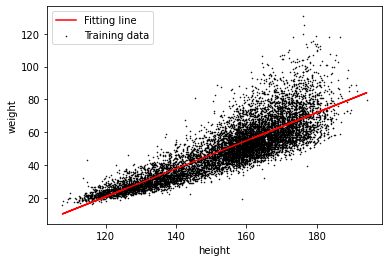

In [ ]:
# Matplotlib으로 결과 시각화

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c="black", s=0.3, label="Training data")

X = x_train
Y = torch.mm(X, W)+b
plt.plot(X, Y, c="red", label="Fitting line")
plt.legend()

plt.ylabel("weight")
plt.xlabel("height")

plt.show()

In [ ]:
x_test = torch.FloatTensor([[180]])
test_result = torch.mm(x_test, W) + b
print(test_result)

tensor([[71.9340]])
